NIM : <br>
nama : <br>
kelas :

# import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# load dataset

In [2]:
# load dataset uts
df = pd.read_csv('data_customer.csv')

df.head(20)

,Gender,Age,Income,Tenure,ServiceCalls,InternetService,PaymentMethod,LoyaltyStatus
0,Male,57,43360,8,4,DSL,Electronic check,Churn
1,Male,65,28255,11,2,Fiber optic,Credit card,Loyal
2,Male,69,88235,2,9,DSL,Mailed check,Loyal
3,Female,47,107464,9,3,DSL,Credit card,Loyal
4,Female,79,68169,6,11,No,Mailed check,Loyal
5,Female,24,20372,1,7,Fiber optic,Bank transfer,Churn
6,Male,34,73179,3,13,Fiber optic,Mailed check,Churn
7,Male,56,77649,10,2,No,Electronic check,Churn
8,Male,55,38898,5,2,DSL,Mailed check,Loyal
9,Male,22,70083,12,10,No,Mailed check,Loyal


# exploratory data analysis

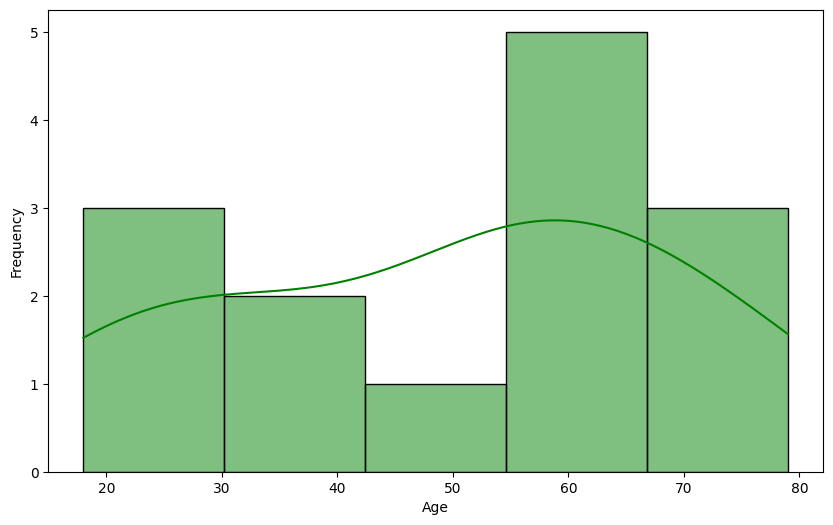

In [3]:
# eda varian 1
plt.figure(figsize=(10,6))
sns.histplot(x='Age',kde=True, color='green', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_3856\951733661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='LoyaltyStatus', y='Age', palette='Set2')


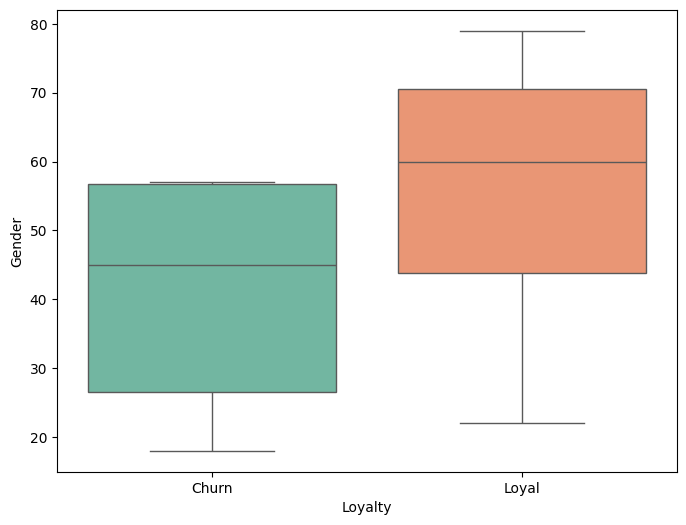

In [4]:
# eda varian 2
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='LoyaltyStatus', y='Age', palette='Set2')
plt.xlabel('Loyalty')
plt.ylabel('Gender')
plt.show()



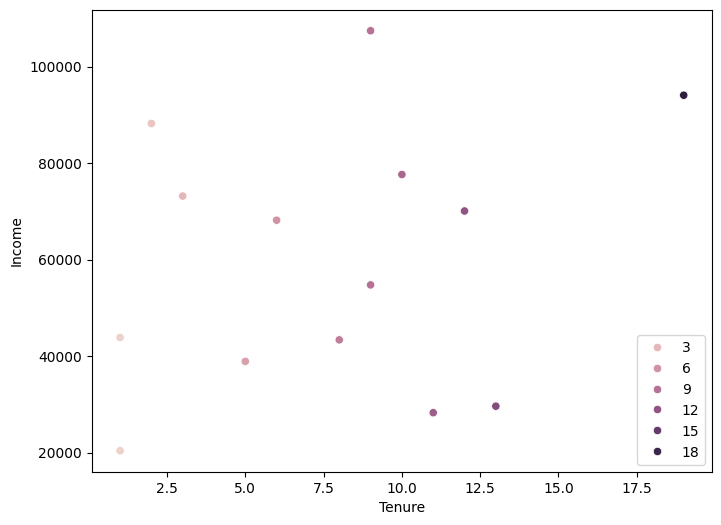

In [5]:
# eda varian 3
plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure',y='Income', data=df, hue='Tenure')
plt.legend()
plt.show()


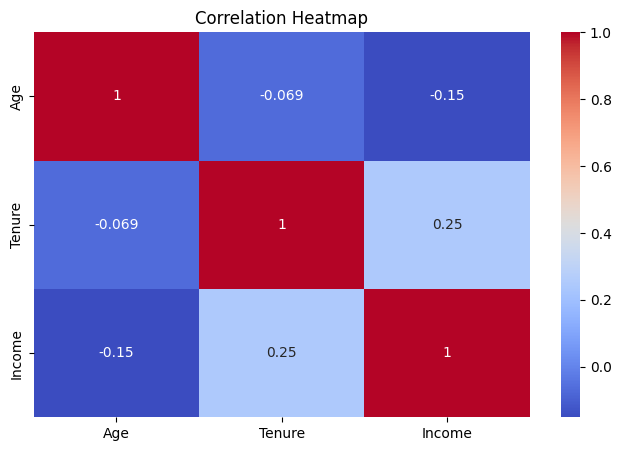

In [6]:
# eda varian 4
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age', 'Tenure', 'Income']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



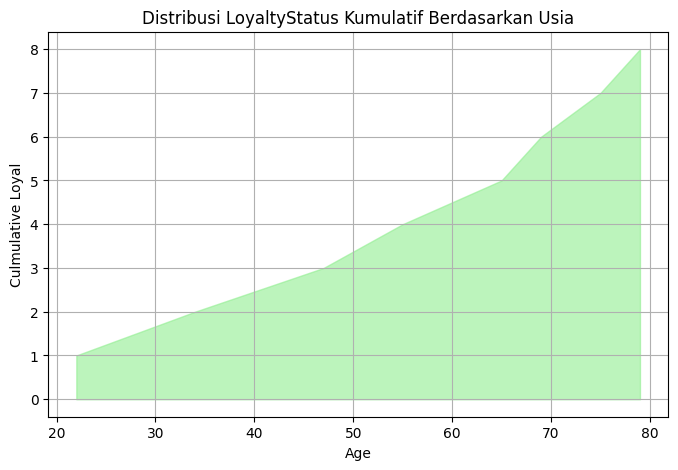

In [7]:
# eda varian 5
age_cum_cases = df[df['LoyaltyStatus']== 'Loyal'].groupby('Age').size().cumsum()
plt.figure(figsize=(8,5))
plt.fill_between(age_cum_cases.index, age_cum_cases.values, color = 'lightgreen', alpha=0.6)
plt.title("Distribusi LoyaltyStatus Kumulatif Berdasarkan Usia")
plt.xlabel("Age")
plt.ylabel("Culmulative Loyal")
plt.grid(True)
plt.show()

# data preprocessing

In [8]:
df = df.drop(columns=['ServiceCalls'])
df = df.drop(columns=['Tenure'])

In [9]:
# Membuat Fungsi untuk meng kategorikan usia
def categorize_age(age):
    if age < 35:
        return "Young"
    elif age < 55:
        return "Middle-aged"
    else:
        return "Senior"

In [10]:
# Membuat Fungsi untuk meng kategorikan income
def categorize_income(income):

    if income < 50000:
        return "Middle-class"
    elif income < 80000:
        return "High-Class"
    else:
        return "Rich"

In [11]:
# Terapkan funsgi pada kolom Age dan buat kolom baru ' Age Category'
df['Age'] = df['Age'].apply(categorize_age)



In [12]:
# Terapkan funsgi pada kolom income dan buat kolom baru ' income Category'
df['Income'] = df['Income'].apply(categorize_income)

In [13]:
df.head(10)

,Gender,Age,Income,InternetService,PaymentMethod,LoyaltyStatus
0,Male,Senior,Middle-class,DSL,Electronic check,Churn
1,Male,Senior,Middle-class,Fiber optic,Credit card,Loyal
2,Male,Senior,Rich,DSL,Mailed check,Loyal
3,Female,Middle-aged,Rich,DSL,Credit card,Loyal
4,Female,Senior,High-Class,No,Mailed check,Loyal
5,Female,Young,Middle-class,Fiber optic,Bank transfer,Churn
6,Male,Young,High-Class,Fiber optic,Mailed check,Churn
7,Male,Senior,High-Class,No,Electronic check,Churn
8,Male,Senior,Middle-class,DSL,Mailed check,Loyal
9,Male,Young,High-Class,No,Mailed check,Loyal


In [14]:
# Encode Semua Variabel kategori
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [15]:
df.head()

,Gender,Age,Income,InternetService,PaymentMethod,LoyaltyStatus
0,1,1,1,0,2,0
1,1,1,1,1,1,1
2,1,1,2,0,3,1
3,0,0,2,0,1,1
4,0,1,0,2,3,1


In [16]:
# Split the datasets
X = df[['Gender', 'Age', 'Income', 'InternetService', 'PaymentMethod']]
y = df['LoyaltyStatus']

# modeling

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [18]:
# Train the C45 model (Decision tree)
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, random_state=42)
model_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [19]:
# Make Predictions
y_pred = model_tree.predict(X)

# simulasi

In [20]:
# Simulate new input data
new_data = pd.DataFrame({
    'Gender':[label_encoders['Gender'].transform(['Male'])[0]],
    'Age' : [label_encoders['Age'].transform(['Middle-aged'])[0]],
    'Income' : [label_encoders['Income'].transform(['Middle-class'])[0]],
    'InternetService' : [label_encoders['InternetService'].transform(['No'])[0]],
    'PaymentMethod': [label_encoders['PaymentMethod'].transform(['Credit card'])[0]]
    
})


In [21]:
new_prediction = model_tree.predict(new_data)

In [22]:
# Decode the new Prediction
new_prediction_decoded = label_encoders['LoyaltyStatus'].inverse_transform(new_prediction)

In [23]:
new_prediction_decoded

array(['Loyal'], dtype=object)

## Evaluasi

In [24]:
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

In [25]:
accuracy, conf_matrix

(0.9285714285714286,
 array([[6, 0],
        [1, 7]], dtype=int64))

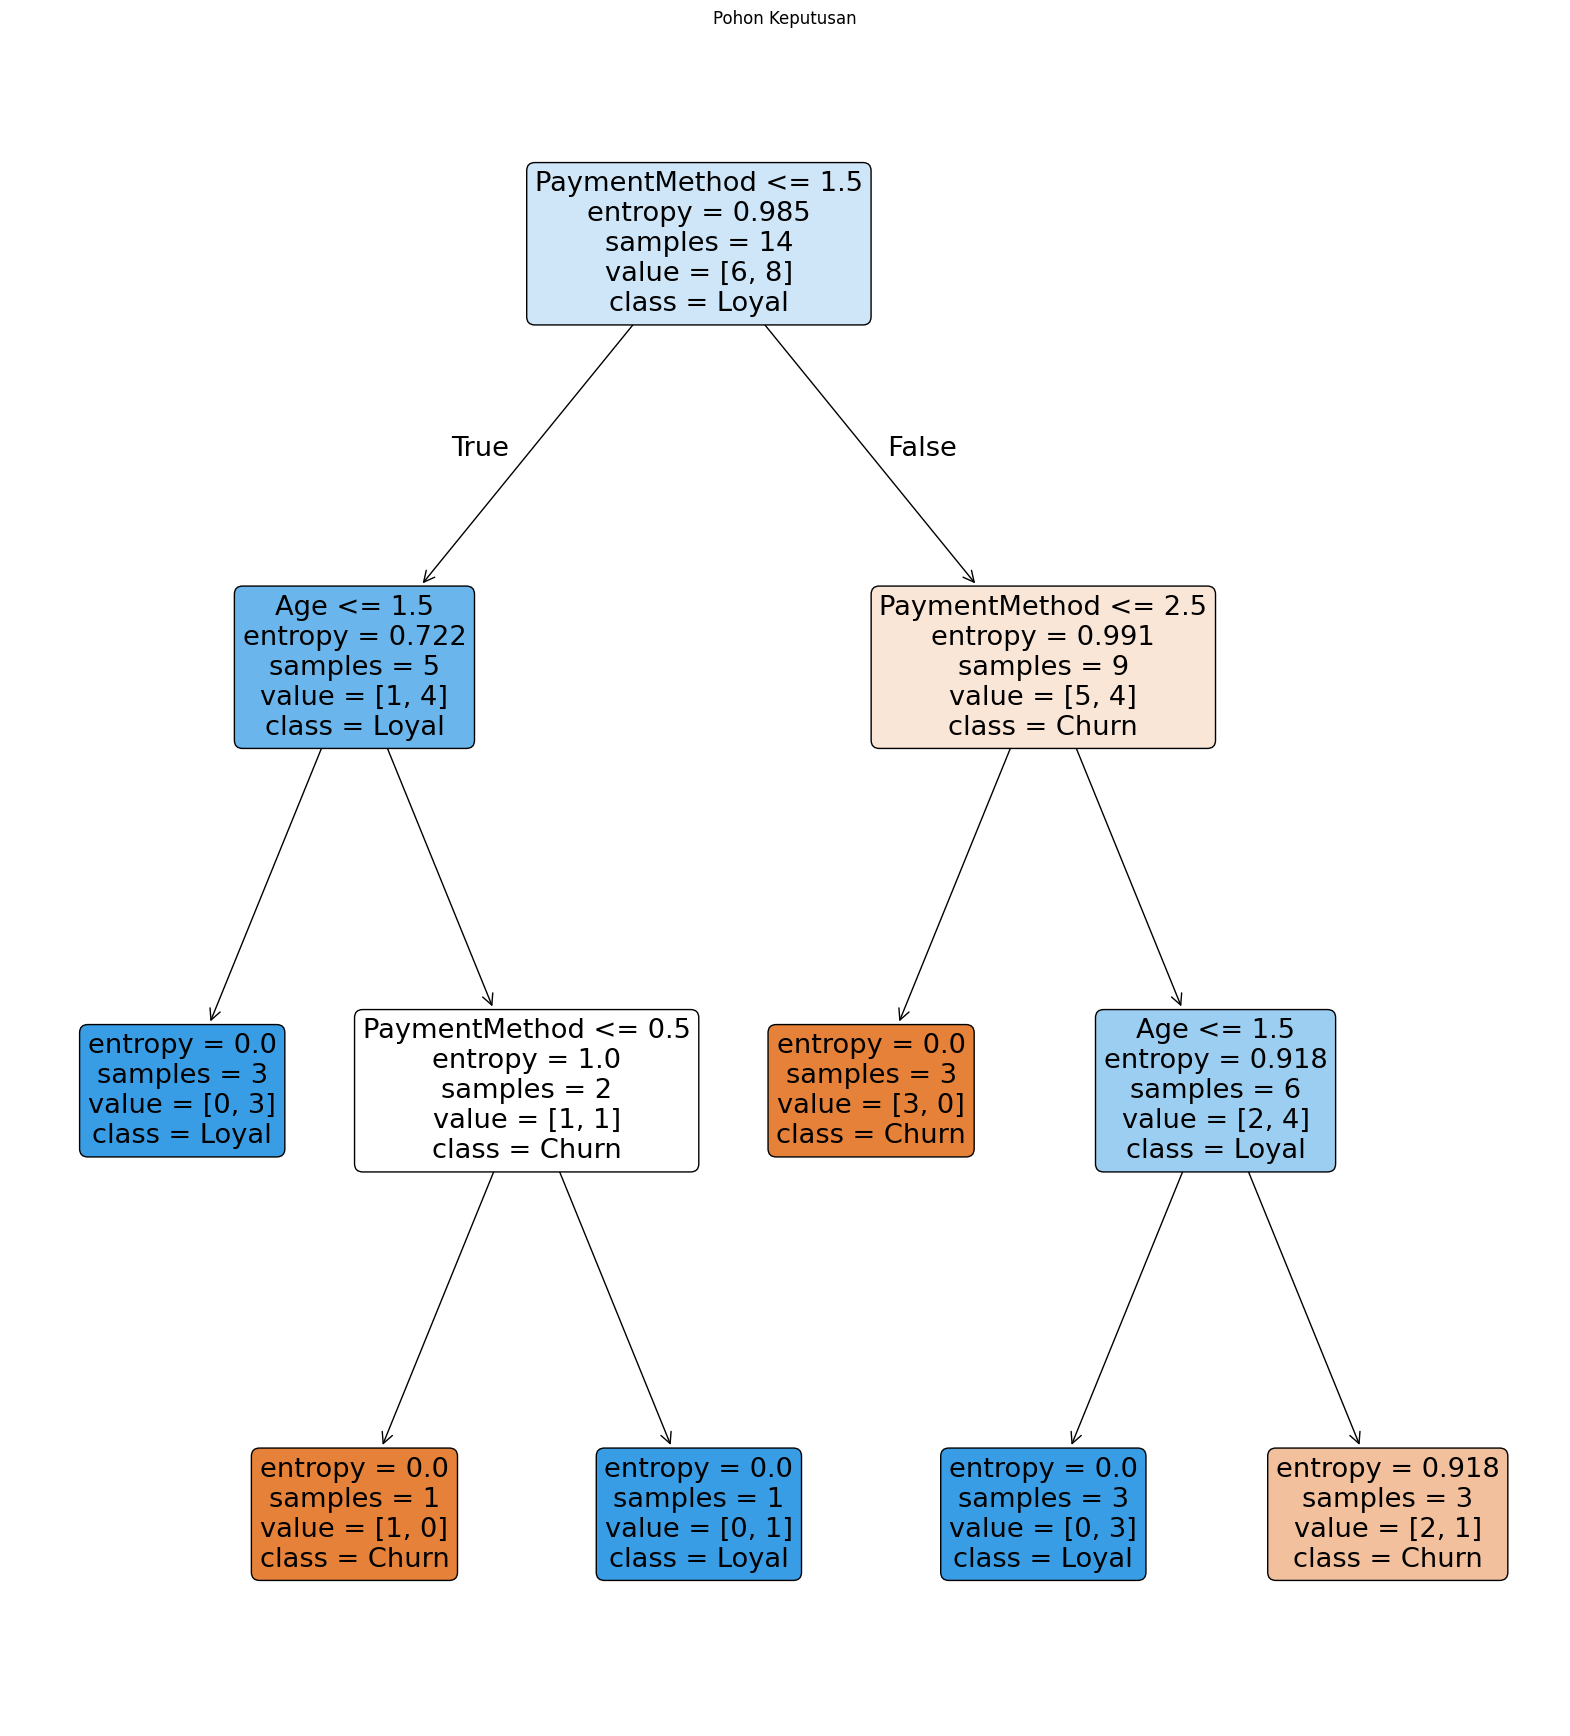

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,22))
plot_tree(model_tree, feature_names=[ 'Gender',
                                 'Age',
                                 'Income',
                                 'InternetService',
                                 'PaymentMethod',
                                 ], class_names=['Churn',
                                                     'Loyal'
                                                     ],
                                                     filled=True, rounded=True)
plt.title("Pohon Keputusan")
plt.show()

In [ ]:
# Menyimpan model 
import pickle

filename ='model_tree.pkl'
pickle.dump(model_tree, open(filename, 'wb'))